<table>
<tr>    
<td>
<img src="http://home.agh.edu.pl/~horzyk/im/AdrianHorzyk140h.png" alt="Adrian Horzyk, Professor" title="Adrian Horzyk, Professor" />        
</td> 
<td style="text-align: center">
<h1>Introduction to Optimization, Regularization, Generalization,<br />and dealing with Underfitting and Overfitting</h1>
<h2><a href="http://home.agh.edu.pl/~horzyk/index-eng.php">Adrian Horzyk</a></h2>
<h3>Welcome to the interactive lecture where you can check everything by yourself and experiment!</h3>
</td> 
</tr>
</table>

# Optimization of the Network Models

Optimizing the developed models is a normal process for every issue we want to solve using computational intelligence methods. Most of the methods and algorithms require the developer's participation in creating the final model. This process encompasses the use of various optimization and regularization methods, data preparation, generation and augmentation, experiments with different network structures and setting up appropriate hyperparameters.

# Underfitting and Overfitting Issues

As we experienced in the previous examples (movie review sentiment prediction, topic classification, and house price regression), we could notice that the performance of our models on the validation data would always peak after a few epochs and would then start degrading, i.e. our model would quickly start to <b>overfit</b> (the <b>variance</b> of the model has risen). Sometimes we also had problems with the achievement of good enough training performance (the <b>bias</b> of the model), when we did not achieved enough high accuraccy or enough small loss, which we call the <b>underfitting</b> problem.

Underfitting and overfitting can happen in every single machine learning problem. Learning how to deal with underfitting and overfitting is essential to mastering machine learning and computational intelligence.

The fundamental issue in machine learning is the tension between optimization and generalization:
* <b>Optimization</b> refers to the process of adjusting a model to get the best performance possible on the training data (low <b>bias</b> of learning).
* <b>Generalization</b> refers to how well the trained model would perform on (test and new) data it has never seen before (low <b>variance</b> of learning).

The goal is to get both good adjustement of the model to the training data and good generalization.

At the beginning of training, optimization and generalization are correlated: the lower your loss on training data, the lower your loss on test data. While this is happening, your model is said to be <b>underfit</b>, i.e., there is still progress to be made because the network has not yet modeled all relevant patterns in the training data. But after a certain number of iterations on the training data, generalization stops improving, validation metrics stall, and then start degrading: the model is starting to <b>overfit</b>, i.e. is it starting to learn patterns that are specific to the training data but that are misleading or irrelevant when it comes to new (test) data, or we say that the model learns by heart.

To prevent a model from learning misleading or irrelevant patterns found in the training data, we can peform a few actions:
* train the model using more training data because then a model will naturally generalize better;
* adapt the quantity of information that your model is allowed to store, or to add constraints on what information it is allowed to store because if a network can only afford to memorize a small number of patterns, the optimization process will force it to focus on the most essential patterns, which have a better chance of generalizing well;
* use other regularization methods like dropout.

The processing of fighting overfitting is called <b>regularization</b>. Let's review some of the most common regularization techniques, and let's apply them in practice to improve our movie classification model.

In [1]:
import numpy as np
import tensorflow as tf
import keras

print ("TensorFlow version: " + tf.__version__)
print ("Keras version: " + keras.__version__)

from keras import models
from keras import layers

TensorFlow version: 2.4.1
Keras version: 2.4.3


## Fighting overfitting: Changing the number of the most frequent words used

Let's check how the number of used most frequent words (`num_top_words`) influences the training process on the same size traing dataset:

In [2]:
from keras.datasets import imdb

def vectorize_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # set specific indices of results[i] to 1s
        results[i, sequence] = 1.
    return results

def vectorize_data_float_labels(data, labels, dimension):
    # Our vectorized training data
    x = vectorize_sequences(data, dimension)
    # Our vectorized labels
    y = np.asarray(labels).astype('float32')
    return x, y

In [47]:
def Create3LModel(num_top_words, hl1 = 16, hl2 = 8):
    model = models.Sequential()
    model.add(layers.Dense(hl1, activation='relu', input_shape=(num_top_words,)))
    model.add(layers.Dense(hl2, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [6]:
# Load IMDB data with the specified number of the most frequently words
num_top_words=5000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_top_words)

x_train, y_train  = vectorize_data_float_labels(train_data, train_labels, num_top_words)
x_val, y_val = vectorize_data_float_labels(test_data, test_labels, num_top_words)

model5000 = Create3LModel(num_top_words=num_top_words, hl1 = 16, hl2 = 8)

model5000.summary()

model5000.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

history5000 = model5000.fit(x_train, y_train,
                            epochs=50,
                            batch_size=256,
                            validation_data=(x_val, y_val))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                80016     
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
98/98 [==============================] - 11s 39ms/step - loss: 0.4859 - acc: 0.7738 - val_loss: 0.3053 - val_acc: 0.8761
Epoch 2/50
98/98 [==============================] - 1s 13ms/step - loss: 0.2430 - acc: 0.9093 - val_loss: 0.2879 - val_acc: 0.8826
Epoch 3/50
98/98 [==============================] - 1s 12ms/step - loss: 0.2048 - acc: 0.9217 - val_loss: 0.3049 - va

In [7]:
# Load IMDB data with the specified number of the most frequently words
num_top_words=10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_top_words)

x_train, y_train  = vectorize_data_float_labels(train_data, train_labels, num_top_words)
x_val, y_val = vectorize_data_float_labels(test_data, test_labels, num_top_words)

model10000 = Create3LModel(num_top_words=num_top_words, hl1 = 16, hl2 = 8)

model10000.summary()

model10000.compile(optimizer='rmsprop',
                   loss='binary_crossentropy',
                   metrics=['acc'])

history10000 = model10000.fit(x_train, y_train,
                              epochs=50,
                              batch_size=256,
                              validation_data=(x_val, y_val))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 160,161
Trainable params: 160,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
98/98 [==============================] - ETA: 0s - loss: 0.5197 - acc: 0.775 - 219s 2s/step - loss: 0.5186 - acc: 0.7766 - val_loss: 0.3061 - val_acc: 0.8861
Epoch 2/50
98/98 [==============================] - 4s 22ms/step - loss: 0.2415 - acc: 0.9171 - val_loss: 0.3245 - val_acc: 0.8670
Epoch 3/50
98/98 [==============================] - 2s 18ms/step - loss: 0.182

In [8]:
# Load IMDB data with the specified number of the most frequently words
num_top_words=2000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_top_words)

x_train, y_train  = vectorize_data_float_labels(train_data, train_labels, num_top_words)
x_val, y_val = vectorize_data_float_labels(test_data, test_labels, num_top_words)

model2000 = Create3LModel(num_top_words=num_top_words, hl1 = 16, hl2 = 8)

model2000.summary()

model2000.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

history2000 = model2000.fit(x_train, y_train,
                            epochs=50,
                            batch_size=256,
                            validation_data=(x_val, y_val))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                32016     
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 9         
Total params: 32,161
Trainable params: 32,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
98/98 [==============================] - 3s 11ms/step - loss: 0.5439 - acc: 0.7425 - val_loss: 0.3351 - val_acc: 0.8676
Epoch 2/50
98/98 [==============================] - 1s 7ms/step - loss: 0.3070 - acc: 0.8808 - val_loss: 0.2991 - val_acc: 0.8766
Epoch 3/50
98/98 [==============================] - 1s 7ms/step - loss: 0.2630 - acc: 0.8948 - val_loss: 0.3053 - val_a

In [55]:
import matplotlib.pyplot as plt  # library for plotting math functions: https://matplotlib.org/stable/index.html
    
def PlotThreeAccuracyComparison(acc1, val_acc1, acc2, val_acc2, acc3, val_acc3, lab1 = '1', lab2 = '2', lab3 = '3'):
    plt.clf()   # clear figure
    plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    epochs = range(len(acc1))
    plt.plot(epochs, acc1, 'bo', label='Training accuracy for ' + lab1)
    plt.plot(epochs, val_acc1, 'b', label='Validation accuracy for ' + lab1)
    plt.plot(epochs, acc2, 'ro', label='Training accuracy for ' + lab2)
    plt.plot(epochs, val_acc2, 'r', label='Validation accuracy for ' + lab2)
    plt.plot(epochs, acc3, 'go', label='Training accuracy for ' + lab3)
    plt.plot(epochs, val_acc3, 'g', label='Validation accuracy for ' + lab3)
    plt.title('Comparison of Training and Validation Accuracies')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [ ]:
# Compare the accuracies of three training processes
acc5000 = history5000.history['acc']
val_acc5000 = history5000.history['val_acc']
acc10000 = history10000.history['acc']
val_acc10000 = history10000.history['val_acc']
acc2000 = history2000.history['acc']
val_acc2000 = history2000.history['val_acc']

PlotThreeAccuracyComparison(acc5000, val_acc5000, acc10000, val_acc10000, acc2000, val_acc2000, '5000', '10000', '2000')

In [54]:
import matplotlib.pyplot as plt  # library for plotting math functions: https://matplotlib.org/stable/index.html

def PlotThreeLossComparison(loss1, val_loss1, loss2, val_loss2, loss3, val_loss3, lab1 = '1', lab2 = '2', lab3 = '3'):
    plt.clf()   # clear figure
    plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    epochs = range(len(loss1))
    plt.plot(epochs, loss1, 'bo', label='Training loss for ' + lab1)
    plt.plot(epochs, val_loss1, 'b', label='Validation loss for ' + lab1)
    plt.plot(epochs, loss2, 'ro', label='Training loss for ' + lab2)
    plt.plot(epochs, val_loss2, 'r', label='Validation loss for ' + lab2)
    plt.plot(epochs, loss3, 'go', label='Training loss for ' + lab3)
    plt.plot(epochs, val_loss3, 'g', label='Validation loss for ' + lab3)
    plt.title('Comparison of Training and Validation Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [ ]:
# Compare the losses of three training processes
loss5000 = history5000.history['loss']
val_loss5000 = history5000.history['val_loss']
loss10000 = history10000.history['loss']
val_loss10000 = history10000.history['val_loss']
loss2000 = history2000.history['loss']
val_loss2000 = history2000.history['val_loss']

PlotThreeLossComparison(loss5000, val_loss5000, loss10000, val_loss10000, loss2000, val_loss2000, '5000', '10000', '2000')

In [ ]:
argmax1 = np.argmax(val_acc5000)
argmax2 = np.argmax(val_acc10000)
argmax3 = np.argmax(val_acc2000)
print ('Max accuracy for model 1 is: ', val_acc5000[argmax1], ', achieved in the ', argmax1 , 'epoch.')
print ('Max accuracy for model 2 is: ', val_acc10000[argmax2], ', achieved in the ', argmax2 , 'epoch.')
print ('Max accuracy for model 3 is: ', val_acc2000[argmax3], ', achieved in the ', argmax3 , 'epoch.')

It shows the maximum validation accuracies achieved during the training and the epoch when it happened. 

## Remarks

As we can see, the accuracy of the model rises slower for the less number of the used words, but the validation loss decreases with the decreasing number of the most frequently used words. So, we can conclude that the use of a smaller number of the most frequently used words is efficient for this task.

We can also notice that the adaptation process of the smallest set of the most frequent words takes the longest time (as is visible in tha Accuracy chart), but this is a positive consequence of forcing the network to learn compressed representation which results in better generalization than achieved for the models which are fitting too quickly! We can conclude that if the model is fitting very quickly, it will overfit the most probably!

Now, you can try to check the other numbers of the most frequent words, e.g. num_top_words=1500 or 1000 or 500 and find the optimal number of such words used in the construction of this model. 

## Fighting overfitting: Reducing the size of the network

One of the simplest ways to prevent overfitting is to reduce the size of the model, i.e. the number of learnable parameters (e.g. weights) in the model, which is determined by the number of layers and the number of units per layer. In deep learning, the number of learnable parameters in a model is often referred to as <b>the model's "capacity"</b>. Intuitively, a model with more parameters will have more "memorization capacity" and therefore will be able to easily learn a perfect dictionary-like mapping between training samples and their targets, i.e. a mapping without any generalization power.

For instance, a model with 600,000 binary parameters could easily be made to learn the classes of all digits of the 
MNIST training set: we would only need 10 binary parameters for each of the 60,000 digits. However, such a model would be useless for classifying new digit samples. Don't believe, check it! Bear this in mind: deep learning models tend to be good at fitting to the training data, but the real challenge is generalization, not fitting. When generalization is poor the model is useless!

On the other hand, if the network has limited memorization resources, it could not be able to learn the desired mapping easily, and thus, in order to minimize its loss, it will have to resort to learning compressed representations that have predictive power regarding the targets -- precisely the type of representations that we are interested in. At the same time, keep in mind that you should be using models that have enough parameters that they won't be underfitting: your model shouldn't be starved for memorization resources. Therefor, we need to find an appropriate compromise between "too much capacity" and "not enough capacity".

Unfortunately, there is no magical formula to determine what the right number of layers is, or what the right size for each layer is. This is a good subject for the scientific study! You will have to evaluate an array of different architectures (on your validation set) in order to find the right model size for your data. The general workflow to find an appropriate model size is to start with relatively few layers and size of layers (i.e., small number of parameters), and start increasing the size of the layers or adding new layers until you see diminishing returns with regard to the validation loss.

Let's try to do this on our movie review classification network. We will compare three networks with different numbers of units in hidden layers, using 2000 of the most frequent words since it was found to return the lowest loss:

In [48]:
# Load IMDB data with the specified number of the most frequently words
num_top_words=2000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_top_words)

x_train, y_train  = vectorize_data_float_labels(train_data, train_labels, num_top_words)
x_val, y_val = vectorize_data_float_labels(test_data, test_labels, num_top_words)

model1 = Create3LModel(num_top_words=num_top_words, hl1 = 16, hl2 = 8)

model1.summary()

model1.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['acc'])

history1 = model1.fit(x_train, y_train,
                      epochs=100,
                      batch_size=256,
                      validation_data=(x_val, y_val))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 16)                32016     
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 9         
Total params: 32,161
Trainable params: 32,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
98/98 [==============================] - 2s 8ms/step - loss: 0.5239 - acc: 0.7601 - val_loss: 0.3203 - val_acc: 0.8726
Epoch 2/100
98/98 [==============================] - 1s 6ms/step - loss: 0.2954 - acc: 0.8822 - val_loss: 0.3055 - val_acc: 0.8730
Epoch 3/100
98/98 [==============================] - 1s 6ms/step - loss: 0.2577 - acc: 0.8968 - val_loss: 0.3108 - val

In [49]:
# Load IMDB data with the specified number of the most frequently words
num_top_words=2000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_top_words)

x_train, y_train  = vectorize_data_float_labels(train_data, train_labels, num_top_words)
x_val, y_val = vectorize_data_float_labels(test_data, test_labels, num_top_words)

model2 = Create3LModel(num_top_words=num_top_words, hl1 = 64, hl2 = 32)

model2.summary()

model2.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

history2 = model2.fit(x_train, y_train,
                      epochs=100,
                      batch_size=256,
                      validation_data=(x_val, y_val))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 64)                128064    
_________________________________________________________________
dense_12 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total params: 130,177
Trainable params: 130,177
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
98/98 [==============================] - 2s 12ms/step - loss: 0.4860 - acc: 0.7707 - val_loss: 0.3315 - val_acc: 0.8621
Epoch 2/100
98/98 [==============================] - 1s 9ms/step - loss: 0.2768 - acc: 0.8871 - val_loss: 0.3180 - val_acc: 0.8669
Epoch 3/100
98/98 [==============================] - 1s 9ms/step - loss: 0.2546 - acc: 0.8959 - val_loss: 0.3133 - 

In [50]:
# Load IMDB data with the specified number of the most frequently words
num_top_words=2000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_top_words)

x_train, y_train  = vectorize_data_float_labels(train_data, train_labels, num_top_words)
x_val, y_val = vectorize_data_float_labels(test_data, test_labels, num_top_words)

model3 = Create3LModel(num_top_words=num_top_words, hl1 = 8, hl2 = 4)

model3.summary()

model3.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['acc'])

history3 = model3.fit(x_train, y_train,
                      epochs=100,
                      batch_size=256,
                      validation_data=(x_val, y_val))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 8)                 16008     
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 5         
Total params: 16,049
Trainable params: 16,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
98/98 [==============================] - 2s 10ms/step - loss: 0.5497 - acc: 0.7378 - val_loss: 0.3613 - val_acc: 0.8573
Epoch 2/100
98/98 [==============================] - 1s 5ms/step - loss: 0.3239 - acc: 0.8754 - val_loss: 0.3088 - val_acc: 0.8733
Epoch 3/100
98/98 [==============================] - 1s 5ms/step - loss: 0.2752 - acc: 0.8890 - val_loss: 0.2995 - va

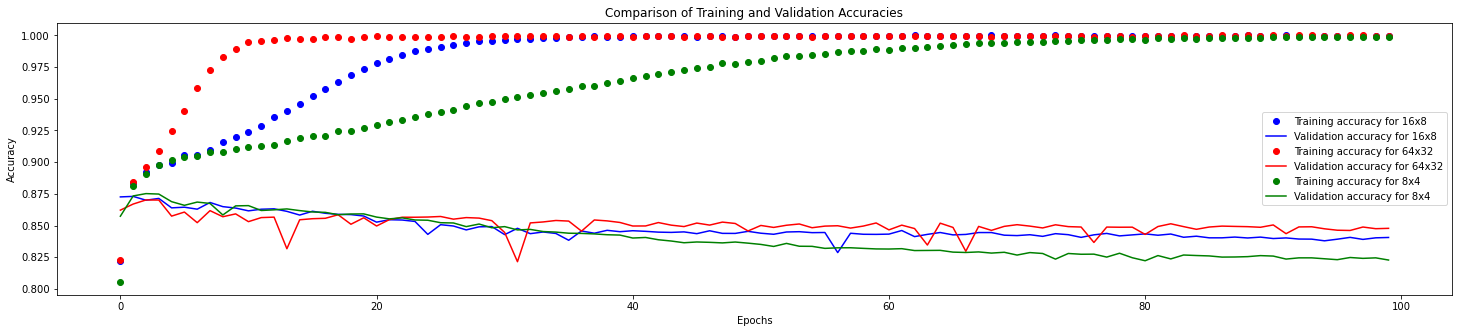

In [56]:
# Compare the accuracies of three training processes
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']

PlotThreeAccuracyComparison(acc1, val_acc1, acc2, val_acc2, acc3, val_acc3, '16x8', '64x32', '8x4')

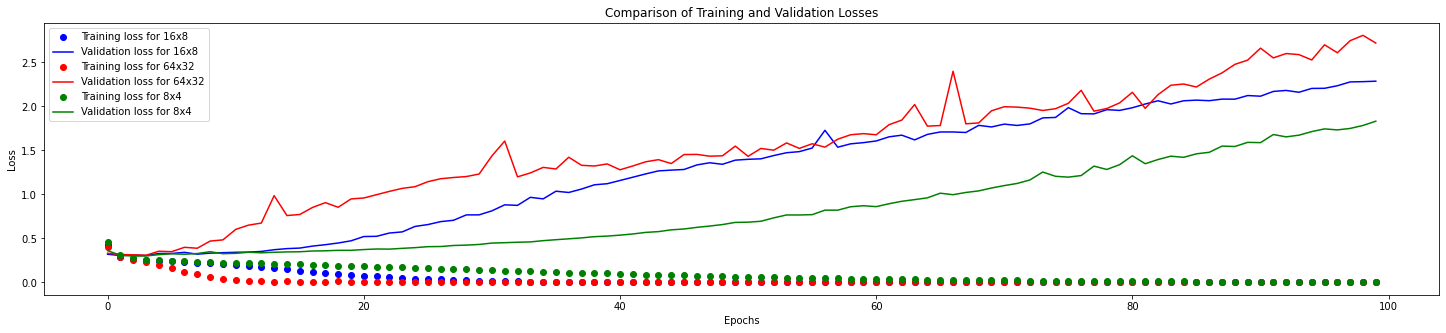

In [57]:
# Compare the losses of three training processes
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

PlotThreeLossComparison(loss1, val_loss1, loss2, val_loss2, loss3, val_loss3, '16x8', '64x32', '8x4')

Again, the model with the smallest number of units in hidden layers achieved the smallest loss in comparison to the other two models; however it learned the slowest because the representation in a small number of units is more challenging than for the other networks. As we could see, we should train this model even longer than for 100 epochs.

The biggest model converged very quickly and fitted almost all training examples perfectly, but its generalization properties are the worst from the compared models because its memorization capacity is too big.

In [58]:
argmax1 = np.argmax(val_acc1)
argmax2 = np.argmax(val_acc2)
argmax3 = np.argmax(val_acc3)
print ('Max accuracy for model 1 is: ', val_acc1[argmax1], ', achieved in the ', argmax1 , 'epoch.')
print ('Max accuracy for model 2 is: ', val_acc2[argmax2], ', achieved in the ', argmax2 , 'epoch.')
print ('Max accuracy for model 3 is: ', val_acc3[argmax3], ', achieved in the ', argmax3 , 'epoch.')

Max accuracy for model 1 is:  0.8729599714279175 , achieved in the  1 epoch.
Max accuracy for model 2 is:  0.8701599836349487 , achieved in the  2 epoch.
Max accuracy for model 3 is:  0.8751599788665771 , achieved in the  2 epoch.


It shows the maximum validation accuracies achieved during the training and the epoch when it happened. 

## Fighting overfitting: Adding weight regularization

If we have two explanations to something, then going after the _Occam's Razor_ principle, the explanation most likely to be correct is the "simplest" one, i.e., the one that makes the least amount of assumptions. This also applies to the neural models: simpler models are less likely to overfit than complex ones.

A "simple model" a model where the distribution of parameter values has less entropy. Thus, a common way to mitigate overfitting is to put constraints on the complexity of a network by forcing its weights to only take small values, which makes the distribution of weight values more "regular". This is called <b>weight regularization</b>, and it is done by adding to the loss function of the network a _cost_ associated with having large weights. This _cost_ comes in two flavors:
* <b>L1 regularization</b>, where the _cost_ added is proportional to the _absolute value of the weights coefficients_ (called the "<b>L1 norm</b>" of the weights).
* <b>L2 regularization</b>, where the _cost_ added is proportional to the _square of the value of the weights coefficients_ (called the "<b>L2 norm</b>" of the weights). L2 regularization is also called <b>_weight decay_</b> in the context of neural networks. Don't let the different name confuse you: weight decay is mathematically the exact same as L2 regularization.

In Keras, weight regularization is added by passing _weight regularizer instances_ to layers as keyword arguments. We can choose between three options:

In [59]:
from keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# L2 regularization
regularizers.l2(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

Let's add weight regularization to our best movie review classification network found in the previous steps and check all three options:

In [60]:
def Create3LModelL1(num_top_words, hl1 = 8, hl2 = 4):
    model = models.Sequential()
    model.add(layers.Dense(hl1, kernel_regularizer=regularizers.l1(0.001),
                           activation='relu', input_shape=(num_top_words,)))
    model.add(layers.Dense(hl2, kernel_regularizer=regularizers.l1(0.001),
                           activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

def Create3LModelL2(num_top_words, hl1 = 8, hl2 = 4):
    model = models.Sequential()
    model.add(layers.Dense(hl1, kernel_regularizer=regularizers.l2(0.001),
                           activation='relu', input_shape=(num_top_words,)))
    model.add(layers.Dense(hl2, kernel_regularizer=regularizers.l2(0.001),
                           activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

def Create3LModelL1L2(num_top_words, hl1 = 8, hl2 = 4):
    model = models.Sequential()
    model.add(layers.Dense(hl1, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                           activation='relu', input_shape=(num_top_words,)))
    model.add(layers.Dense(hl2, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                           activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [61]:
# Load IMDB data with the specified number of the most frequently words
num_top_words=2000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_top_words)

x_train, y_train  = vectorize_data_float_labels(train_data, train_labels, num_top_words)
x_val, y_val = vectorize_data_float_labels(test_data, test_labels, num_top_words)

model1 = Create3LModelL1(num_top_words=num_top_words, hl1 = 8, hl2 = 4)

model1.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['acc'])

historyL1 = model1.fit(x_train, y_train,
                       epochs=100,
                       batch_size=256,
                       validation_data=(x_val, y_val))

Epoch 1/100
98/98 [==============================] - 2s 8ms/step - loss: 0.8875 - acc: 0.6548 - val_loss: 0.6277 - val_acc: 0.7983
Epoch 2/100
98/98 [==============================] - 1s 6ms/step - loss: 0.6145 - acc: 0.8071 - val_loss: 0.5836 - val_acc: 0.8106
Epoch 3/100
98/98 [==============================] - 1s 5ms/step - loss: 0.5688 - acc: 0.8337 - val_loss: 0.5239 - val_acc: 0.8520
Epoch 4/100
98/98 [==============================] - 1s 5ms/step - loss: 0.4907 - acc: 0.8611 - val_loss: 0.4555 - val_acc: 0.8624
Epoch 5/100
98/98 [==============================] - 1s 5ms/step - loss: 0.4471 - acc: 0.8659 - val_loss: 0.4402 - val_acc: 0.8630
Epoch 6/100
98/98 [==============================] - 1s 5ms/step - loss: 0.4250 - acc: 0.8705 - val_loss: 0.4469 - val_acc: 0.8556
Epoch 7/100
98/98 [==============================] - 1s 5ms/step - loss: 0.4208 - acc: 0.8702 - val_loss: 0.4261 - val_acc: 0.8651
Epoch 8/100
98/98 [==============================] - 1s 5ms/step - loss: 0.4089 - a

In [12]:
# Load IMDB data with the specified number of the most frequently words
num_top_words=2000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_top_words)

x_train, y_train  = vectorize_data_float_labels(train_data, train_labels, num_top_words)
x_val, y_val = vectorize_data_float_labels(test_data, test_labels, num_top_words)

model2 = Create3LModelL2(num_top_words=num_top_words, hl1 = 8, hl2 = 4)

model2.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['acc'])

historyL2 = model2.fit(x_train, y_train,
                       epochs=100,
                       batch_size=256,
                       validation_data=(x_val, y_val))

Epoch 1/100
98/98 [==============================] - 2s 10ms/step - loss: 0.6432 - acc: 0.6623 - val_loss: 0.5164 - val_acc: 0.8483
Epoch 2/100
98/98 [==============================] - 1s 7ms/step - loss: 0.4970 - acc: 0.8603 - val_loss: 0.4832 - val_acc: 0.8580
Epoch 3/100
98/98 [==============================] - 1s 7ms/step - loss: 0.4626 - acc: 0.8832 - val_loss: 0.4696 - val_acc: 0.8595
Epoch 4/100
98/98 [==============================] - 1s 7ms/step - loss: 0.4380 - acc: 0.8907 - val_loss: 0.4506 - val_acc: 0.8715
Epoch 5/100
98/98 [==============================] - 1s 7ms/step - loss: 0.4198 - acc: 0.8973 - val_loss: 0.4409 - val_acc: 0.8682
Epoch 6/100
98/98 [==============================] - 1s 7ms/step - loss: 0.4003 - acc: 0.8992 - val_loss: 0.4315 - val_acc: 0.8664
Epoch 7/100
98/98 [==============================] - 1s 7ms/step - loss: 0.3889 - acc: 0.8986 - val_loss: 0.4300 - val_acc: 0.8574
Epoch 8/100
98/98 [==============================] - 1s 7ms/step - loss: 0.3709 - 

In [13]:
# Load IMDB data with the specified number of the most frequently words
num_top_words=2000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_top_words)

x_train, y_train  = vectorize_data_float_labels(train_data, train_labels, num_top_words)
x_val, y_val = vectorize_data_float_labels(test_data, test_labels, num_top_words)

model3 = Create3LModelL1L2(num_top_words=num_top_words, hl1 = 8, hl2 = 4)

model3.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['acc'])

historyL3 = model3.fit(x_train, y_train,
                       epochs=100,
                       batch_size=256,
                       validation_data=(x_val, y_val))

Epoch 1/100
98/98 [==============================] - 2s 11ms/step - loss: 0.8793 - acc: 0.6077 - val_loss: 0.6319 - val_acc: 0.7630
Epoch 2/100
98/98 [==============================] - 1s 7ms/step - loss: 0.6194 - acc: 0.7898 - val_loss: 0.5863 - val_acc: 0.8244
Epoch 3/100
98/98 [==============================] - 1s 7ms/step - loss: 0.5778 - acc: 0.8275 - val_loss: 0.5586 - val_acc: 0.8385
Epoch 4/100
98/98 [==============================] - 1s 8ms/step - loss: 0.5522 - acc: 0.8446 - val_loss: 0.5370 - val_acc: 0.8380
Epoch 5/100
98/98 [==============================] - 1s 7ms/step - loss: 0.5252 - acc: 0.8591 - val_loss: 0.5224 - val_acc: 0.8399
Epoch 6/100
98/98 [==============================] - 1s 7ms/step - loss: 0.5142 - acc: 0.8589 - val_loss: 0.5038 - val_acc: 0.8519
Epoch 7/100
98/98 [==============================] - 1s 7ms/step - loss: 0.4945 - acc: 0.8674 - val_loss: 0.5132 - val_acc: 0.8511
Epoch 8/100
98/98 [==============================] - 1s 7ms/step - loss: 0.4768 - 

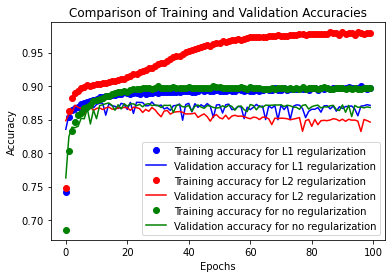

In [17]:
# Compare the accuracies of three training processes
acc1 = historyL1.history['acc']
val_acc1 = historyL1.history['val_acc']
acc2 = historyL2.history['acc']
val_acc2 = historyL2.history['val_acc']
acc3 = historyL3.history['acc']
val_acc3 = historyL3.history['val_acc']

PlotThreeAccuracyComparison(acc1, val_acc1, acc2, val_acc2, acc3, val_acc3, 'L1 regularization', 'L2 regularization', 'no regularization')

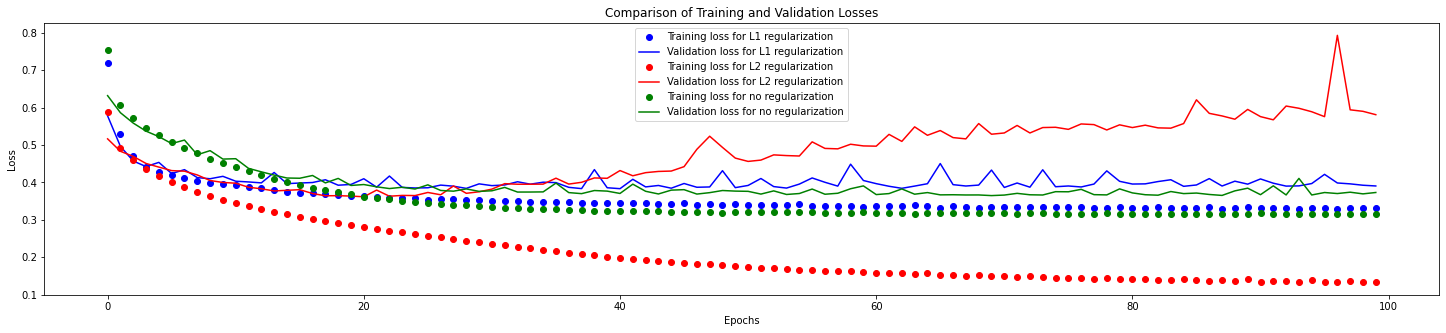

In [21]:
# Compare the losses of three training processes
loss1 = historyL1.history['loss']
val_loss1 = historyL1.history['val_loss']
loss2 = historyL2.history['loss']
val_loss2 = historyL2.history['val_loss']
loss3 = historyL3.history['loss']
val_loss3 = historyL3.history['val_loss']

PlotThreeLossComparison(loss1, val_loss1, loss2, val_loss2, loss3, val_loss3, 'L1 regularization', 'L2 regularization', 'no regularization')

In [22]:
argmax1 = np.argmax(val_acc1)
argmax2 = np.argmax(val_acc2)
argmax3 = np.argmax(val_acc3)
print ('Max accuracy for model 1 is: ', val_acc1[argmax1], ', achieved in the ', argmax1 , 'epoch.')
print ('Max accuracy for model 2 is: ', val_acc2[argmax2], ', achieved in the ', argmax2 , 'epoch.')
print ('Max accuracy for model 3 is: ', val_acc3[argmax3], ', achieved in the ', argmax3 , 'epoch.')

Max accuracy for model 1 is:  0.8762800097465515 , achieved in the  28 epoch.
Max accuracy for model 2 is:  0.8714799880981445 , achieved in the  3 epoch.
Max accuracy for model 3 is:  0.8747599720954895 , achieved in the  14 epoch.


Now, we can compare training results for the model without regularization and the models with L1 or L2 regularization.

The model without regularization had less loss during the training time, but for the validation data, we can see that the results achieved for both L1 and L2 regularized models are much better than for the non-regularized model!

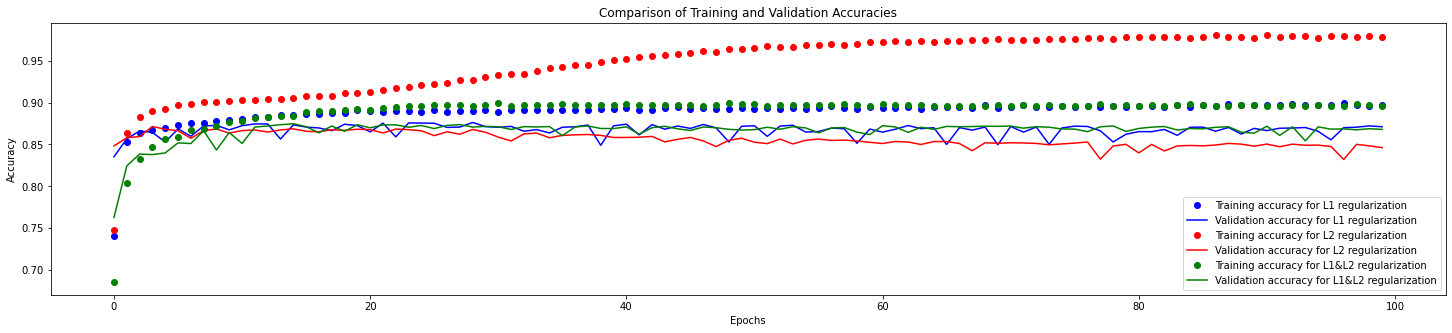

In [23]:
# Compare the accuracies of three training processes
acc1 = historyL1.history['acc']
val_acc1 = historyL1.history['val_acc']
acc2 = historyL2.history['acc']
val_acc2 = historyL2.history['val_acc']
acc3 = historyL3.history['acc']
val_acc3 = historyL3.history['val_acc']

PlotThreeAccuracyComparison(acc1, val_acc1, acc2, val_acc2, acc3, val_acc3, 'L1 regularization', 'L2 regularization', 'L1&L2 regularization')

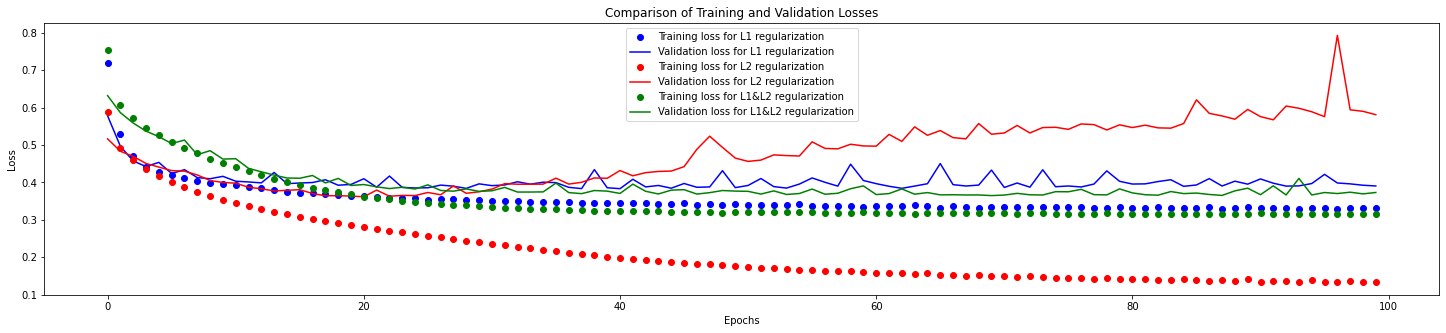

In [24]:
# Compare the losses of three training processes
loss1 = historyL1.history['loss']
val_loss1 = historyL1.history['val_loss']
loss2 = historyL2.history['loss']
val_loss2 = historyL2.history['val_loss']
loss3 = historyL3.history['loss']
val_loss3 = historyL3.history['val_loss']

PlotThreeLossComparison(loss1, val_loss1, loss2, val_loss2, loss3, val_loss3, 'L1 regularization', 'L2 regularization', 'L1&L2 regularization')

The comparison of the losses for L1, L2 and L1&L2 regularizations shows us that the least loss during training was achieved for L2 regularization, but the worst loss for the validation data at the same time. There is not much difference between the use of L1 and L1&L2 regularizations.

We could see how the L2 regularization (`l2(0.001)`) penalty impacted the training process. `l2(0.001)` means that every coefficient in the weight matrix of the layer will add `0.001 * weight_coefficient_value` to the total loss of the network. Note that because this penalty is _only added at training time_, the loss for this network was be much higher at training 
than at test time.

In [25]:
argmax1 = np.argmax(val_acc1)
argmax2 = np.argmax(val_acc2)
argmax3 = np.argmax(val_acc3)
print ('Max accuracy for model 1 is: ', val_acc1[argmax1], ', achieved in the ', argmax1 , 'epoch.')
print ('Max accuracy for model 2 is: ', val_acc2[argmax2], ', achieved in the ', argmax2 , 'epoch.')
print ('Max accuracy for model 3 is: ', val_acc3[argmax3], ', achieved in the ', argmax3 , 'epoch.')

Max accuracy for model 1 is:  0.8762800097465515 , achieved in the  28 epoch.
Max accuracy for model 2 is:  0.8714799880981445 , achieved in the  3 epoch.
Max accuracy for model 3 is:  0.8747599720954895 , achieved in the  14 epoch.


## Fighting overfitting: Adding dropout

<b>Dropout</b> is one of the most effective and commonly used regularization techniques for neural networks, developed by Hinton and his students at the University of Toronto. Dropout, applied to a layer, consists of randomly "dropping out" (i.e., setting to zero) a number of output features of the layer during training with a given probability (usually between 0.2 and 0.5). At test time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

To illustrate it, consider a Numpy matrix containing the output of a layer, `layer_output`, of shape `(batch_size, features)`. At training time, we would be zero-ing out at random a fraction of the values in the matrix and scaling by 0.5 to stay consistent with the similar strength of stimulation in the test time and leaving the output unchanged at test time:

In [ ]:
# At training time:
#layer_output *= np.randint(0, high=2, size=layer_output.shape)
# We are scaling *up* to stay consistent with the stimulations in the test time
#layer_output /= 0.5


This technique may seem strange and arbitrary. Why would this help reduce overfitting? Geoff Hinton has said that he was inspired, among other things, by a fraud prevention mechanism used by banks - in his own words: _"I went to my bank. The tellers kept changing and I asked one of them why. He said he didn’t know but they got moved around a lot. I figured it must be because it would require cooperation between employees to successfully defraud the bank. This made me realize that randomly removing a different subset of neurons on each example would prevent conspiracies and thus reduce overfitting"_.

The core idea is that introducing noise in the output values of a layer can break up happenstance patterns that are not significant (what Hinton refers to as "conspiracies"), which the network would start memorizing if no noise was present. 

In Keras, you can introduce dropout in a network via the `Dropout` layer, which gets applied to the output of layer right before it.

In [ ]:
model.add(layers.Dropout(0.5))

We should use dropout with care, especially to layers containing small number of units because switching out too many units can result in underfitting, so in the following experiments we double the number of units in the hidden layers.

Let's do three experiments with dropout of different probabilities `probdrop` to check which one is reducing the overfitting the most in our IMDB network:

In [62]:
def Create3LModelL1Dropout(num_top_words, hl1 = 8, hl2 = 4, probdrop=0.5):
    model = models.Sequential()
    model.add(layers.Dense(hl1, kernel_regularizer=regularizers.l1(0.001),
                           activation='relu', input_shape=(num_top_words,)))
    model.add(layers.Dropout(probdrop))
    model.add(layers.Dense(hl2, kernel_regularizer=regularizers.l1(0.001),
                           activation='relu'))
    model.add(layers.Dropout(probdrop))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [63]:
# Load IMDB data with the specified number of the most frequently words
num_top_words=2000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_top_words)

x_train, y_train  = vectorize_data_float_labels(train_data, train_labels, num_top_words)
x_val, y_val = vectorize_data_float_labels(test_data, test_labels, num_top_words)

model1 = Create3LModelL1Dropout(num_top_words=num_top_words, hl1 = 16, hl2 = 8, probdrop=0.5)

model1.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['acc'])

historyD1 = model1.fit(x_train, y_train,
                       epochs=100,
                       batch_size=256,
                       validation_data=(x_val, y_val))

Epoch 1/100
98/98 [==============================] - 2s 9ms/step - loss: 1.1236 - acc: 0.5532 - val_loss: 0.6808 - val_acc: 0.7978
Epoch 2/100
98/98 [==============================] - 1s 7ms/step - loss: 0.6884 - acc: 0.6848 - val_loss: 0.6106 - val_acc: 0.8157
Epoch 3/100
98/98 [==============================] - 1s 7ms/step - loss: 0.6365 - acc: 0.7322 - val_loss: 0.5388 - val_acc: 0.8494
Epoch 4/100
98/98 [==============================] - 1s 7ms/step - loss: 0.6046 - acc: 0.7725 - val_loss: 0.5106 - val_acc: 0.8542
Epoch 5/100
98/98 [==============================] - 1s 6ms/step - loss: 0.5807 - acc: 0.7888 - val_loss: 0.5106 - val_acc: 0.8489
Epoch 6/100
98/98 [==============================] - 1s 7ms/step - loss: 0.5721 - acc: 0.8064 - val_loss: 0.4894 - val_acc: 0.8552
Epoch 7/100
98/98 [==============================] - 1s 6ms/step - loss: 0.5604 - acc: 0.8149 - val_loss: 0.4811 - val_acc: 0.8608
Epoch 8/100
98/98 [==============================] - 1s 6ms/step - loss: 0.5576 - a

In [64]:
# Load IMDB data with the specified number of the most frequently words
num_top_words=2000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_top_words)

x_train, y_train  = vectorize_data_float_labels(train_data, train_labels, num_top_words)
x_val, y_val = vectorize_data_float_labels(test_data, test_labels, num_top_words)

model2 = Create3LModelL1Dropout(num_top_words=num_top_words, hl1 = 16, hl2 = 8, probdrop=0.25)

model2.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['acc'])

historyD2 = model2.fit(x_train, y_train,
                       epochs=100,
                       batch_size=256,
                       validation_data=(x_val, y_val))

Epoch 1/100
98/98 [==============================] - 2s 10ms/step - loss: 1.1164 - acc: 0.6408 - val_loss: 0.5827 - val_acc: 0.8425
Epoch 2/100
98/98 [==============================] - 1s 7ms/step - loss: 0.6012 - acc: 0.8055 - val_loss: 0.5141 - val_acc: 0.8559
Epoch 3/100
98/98 [==============================] - 1s 6ms/step - loss: 0.5404 - acc: 0.8311 - val_loss: 0.4835 - val_acc: 0.8629
Epoch 4/100
98/98 [==============================] - 1s 7ms/step - loss: 0.5153 - acc: 0.8463 - val_loss: 0.4780 - val_acc: 0.8640
Epoch 5/100
98/98 [==============================] - 1s 7ms/step - loss: 0.5018 - acc: 0.8553 - val_loss: 0.4692 - val_acc: 0.8621
Epoch 6/100
98/98 [==============================] - 1s 7ms/step - loss: 0.4948 - acc: 0.8588 - val_loss: 0.4617 - val_acc: 0.8685
Epoch 7/100
98/98 [==============================] - 1s 7ms/step - loss: 0.4832 - acc: 0.8624 - val_loss: 0.4582 - val_acc: 0.8662
Epoch 8/100
98/98 [==============================] - 1s 6ms/step - loss: 0.4863 - 

In [65]:
# Load IMDB data with the specified number of the most frequently words
num_top_words=2000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_top_words)

x_train, y_train  = vectorize_data_float_labels(train_data, train_labels, num_top_words)
x_val, y_val = vectorize_data_float_labels(test_data, test_labels, num_top_words)

model3 = Create3LModelL1Dropout(num_top_words=num_top_words, hl1 = 16, hl2 = 8, probdrop=0.15)

model3.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['acc'])

historyD3 = model3.fit(x_train, y_train,
                       epochs=100,
                       batch_size=256,
                       validation_data=(x_val, y_val))

Epoch 1/100
98/98 [==============================] - 2s 11ms/step - loss: 1.0880 - acc: 0.6804 - val_loss: 0.5669 - val_acc: 0.8560
Epoch 2/100
98/98 [==============================] - 1s 7ms/step - loss: 0.5777 - acc: 0.8322 - val_loss: 0.5022 - val_acc: 0.8612
Epoch 3/100
98/98 [==============================] - 1s 7ms/step - loss: 0.5333 - acc: 0.8459 - val_loss: 0.4820 - val_acc: 0.8656
Epoch 4/100
98/98 [==============================] - 1s 7ms/step - loss: 0.5099 - acc: 0.8513 - val_loss: 0.4778 - val_acc: 0.8648
Epoch 5/100
98/98 [==============================] - 1s 6ms/step - loss: 0.4956 - acc: 0.8562 - val_loss: 0.4736 - val_acc: 0.8632
Epoch 6/100
98/98 [==============================] - 1s 7ms/step - loss: 0.4847 - acc: 0.8588 - val_loss: 0.5172 - val_acc: 0.8336
Epoch 7/100
98/98 [==============================] - 1s 6ms/step - loss: 0.4820 - acc: 0.8617 - val_loss: 0.4520 - val_acc: 0.8708
Epoch 8/100
98/98 [==============================] - 1s 7ms/step - loss: 0.4773 - 

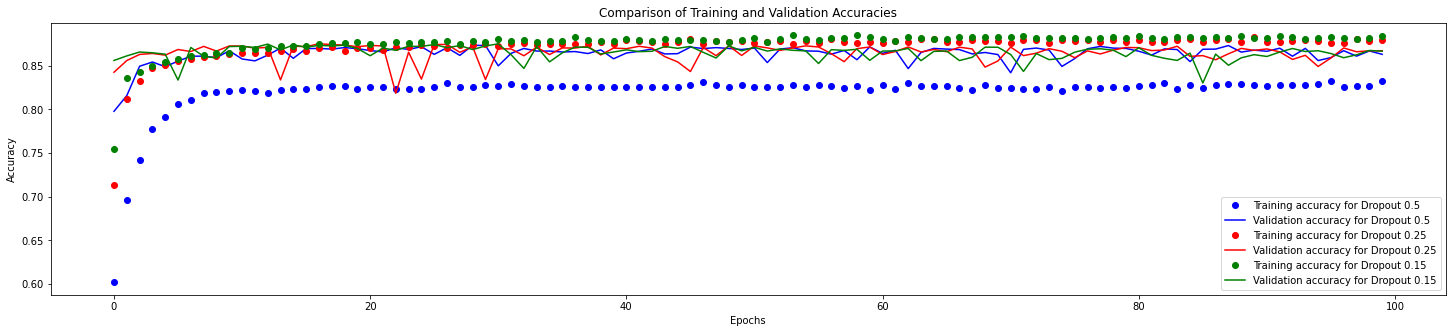

In [66]:
# Compare the accuracies of three training processes
acc1 = historyD1.history['acc']
val_acc1 = historyD1.history['val_acc']
acc2 = historyD2.history['acc']
val_acc2 = historyD2.history['val_acc']
acc3 = historyD3.history['acc']
val_acc3 = historyD3.history['val_acc']

PlotThreeAccuracyComparison(acc1, val_acc1, acc2, val_acc2, acc3, val_acc3, 'Dropout 0.5', 'Dropout 0.25', 'Dropout 0.15')

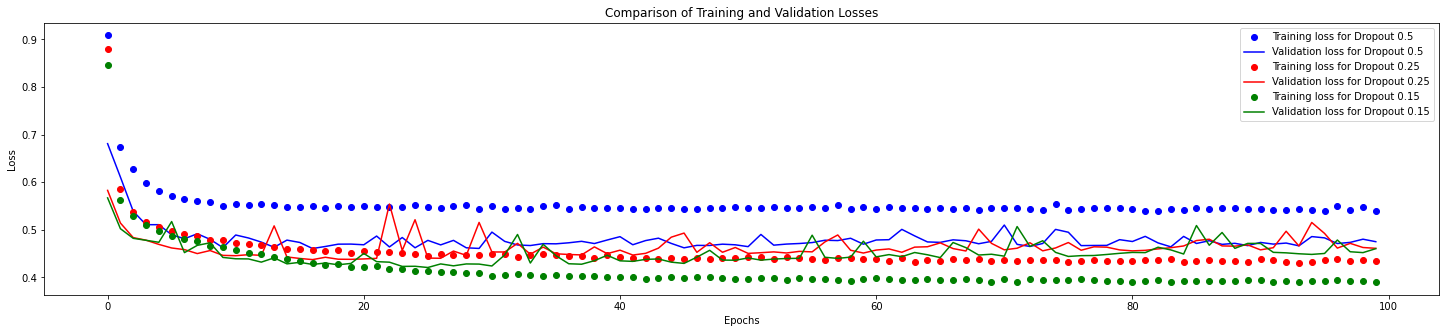

In [67]:
# Compare the losses of three training processes
loss1 = historyD1.history['loss']
val_loss1 = historyD1.history['val_loss']
loss2 = historyD2.history['loss']
val_loss2 = historyD2.history['val_loss']
loss3 = historyD3.history['loss']
val_loss3 = historyD3.history['val_loss']

PlotThreeLossComparison(loss1, val_loss1, loss2, val_loss2, loss3, val_loss3, 'Dropout 0.5', 'Dropout 0.25', 'Dropout 0.15')

There is not much difference in the validation accuracies nor losses of these models; however, the more stable is learned the model with the smallest dropout.

In [68]:
argmax1 = np.argmax(val_acc1)
argmax2 = np.argmax(val_acc2)
argmax3 = np.argmax(val_acc3)
print ('Max accuracy for model 1 is: ', val_acc1[argmax1], ', achieved in the ', argmax1 , 'epoch.')
print ('Max accuracy for model 2 is: ', val_acc2[argmax2], ', achieved in the ', argmax2 , 'epoch.')
print ('Max accuracy for model 3 is: ', val_acc3[argmax3], ', achieved in the ', argmax3 , 'epoch.')

Max accuracy for model 1 is:  0.8733199834823608 , achieved in the  28 epoch.
Max accuracy for model 2 is:  0.8751599788665771 , achieved in the  16 epoch.
Max accuracy for model 3 is:  0.875 , achieved in the  30 epoch.


## Summary

To recap: here the most common ways to prevent overfitting in neural networks:
* Getting more training data.
* Reducing the capacity of the network.
* Adding weight regularization.
* Adding dropout.

Now, change some hyperparameters (green and red) in the above models and try to achieve a final model that will be even better than the above one.

In [69]:
def Create2LModelL1Dropout(num_top_words, hl1 = 32, probdrop=0.2):
    model = models.Sequential()
    model.add(layers.Dense(hl1, kernel_regularizer=regularizers.l1(0.001),
                           activation='relu', input_shape=(num_top_words,)))
    model.add(layers.Dropout(probdrop))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [70]:
# Load IMDB data with the specified number of the most frequently words
num_top_words=2000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_top_words)

x_train, y_train  = vectorize_data_float_labels(train_data, train_labels, num_top_words)
x_val, y_val = vectorize_data_float_labels(test_data, test_labels, num_top_words)

model1 = Create3LModelL1Dropout(num_top_words=num_top_words, hl1 = 8, probdrop=0.2)

model1.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['acc'])

history1 = model1.fit(x_train, y_train,
                      epochs=100,
                      batch_size=512,
                      validation_data=(x_val, y_val))

Epoch 1/100
49/49 [==============================] - 2s 15ms/step - loss: 0.9512 - acc: 0.5859 - val_loss: 0.6775 - val_acc: 0.7607
Epoch 2/100
49/49 [==============================] - 0s 9ms/step - loss: 0.6700 - acc: 0.7012 - val_loss: 0.6119 - val_acc: 0.8106
Epoch 3/100
49/49 [==============================] - 1s 11ms/step - loss: 0.6251 - acc: 0.7258 - val_loss: 0.5660 - val_acc: 0.8346
Epoch 4/100
49/49 [==============================] - 0s 10ms/step - loss: 0.5925 - acc: 0.7451 - val_loss: 0.5400 - val_acc: 0.8365
Epoch 5/100
49/49 [==============================] - 0s 10ms/step - loss: 0.5748 - acc: 0.7443 - val_loss: 0.5046 - val_acc: 0.8463
Epoch 6/100
49/49 [==============================] - 0s 9ms/step - loss: 0.5490 - acc: 0.7610 - val_loss: 0.4935 - val_acc: 0.8481
Epoch 7/100
49/49 [==============================] - 0s 10ms/step - loss: 0.5404 - acc: 0.7650 - val_loss: 0.4749 - val_acc: 0.8530
Epoch 8/100
49/49 [==============================] - 0s 10ms/step - loss: 0.51

In [71]:
# Load IMDB data with the specified number of the most frequently words
num_top_words=2000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_top_words)

x_train, y_train  = vectorize_data_float_labels(train_data, train_labels, num_top_words)
x_val, y_val = vectorize_data_float_labels(test_data, test_labels, num_top_words)

model2 = Create3LModelL1Dropout(num_top_words=num_top_words, hl1 = 16, probdrop=0.2)

model2.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['acc'])

history2 = model2.fit(x_train, y_train,
                      epochs=100,
                      batch_size=512,
                      validation_data=(x_val, y_val))

Epoch 1/100
49/49 [==============================] - 1s 14ms/step - loss: 1.1838 - acc: 0.6165 - val_loss: 0.6503 - val_acc: 0.8348
Epoch 2/100
49/49 [==============================] - 0s 9ms/step - loss: 0.6500 - acc: 0.7697 - val_loss: 0.5609 - val_acc: 0.8453
Epoch 3/100
49/49 [==============================] - 0s 9ms/step - loss: 0.5899 - acc: 0.7968 - val_loss: 0.5268 - val_acc: 0.8492
Epoch 4/100
49/49 [==============================] - 0s 9ms/step - loss: 0.5648 - acc: 0.8057 - val_loss: 0.5247 - val_acc: 0.8380
Epoch 5/100
49/49 [==============================] - 0s 9ms/step - loss: 0.5532 - acc: 0.8116 - val_loss: 0.5028 - val_acc: 0.8522
Epoch 6/100
49/49 [==============================] - 0s 9ms/step - loss: 0.5331 - acc: 0.8228 - val_loss: 0.4918 - val_acc: 0.8507
Epoch 7/100
49/49 [==============================] - 0s 9ms/step - loss: 0.5202 - acc: 0.8298 - val_loss: 0.4792 - val_acc: 0.8584
Epoch 8/100
49/49 [==============================] - 0s 9ms/step - loss: 0.5144 - 

In [76]:
# Load IMDB data with the specified number of the most frequently words
num_top_words=2000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_top_words)

x_train, y_train  = vectorize_data_float_labels(train_data, train_labels, num_top_words)
x_val, y_val = vectorize_data_float_labels(test_data, test_labels, num_top_words)

model3 = Create3LModelL1Dropout(num_top_words=num_top_words, hl1 = 64, probdrop=0.2)

model3.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['acc'])

history3 = model3.fit(x_train, y_train,
                      epochs=100,
                      batch_size=512,
                      validation_data=(x_val, y_val))

Epoch 1/100
49/49 [==============================] - 2s 19ms/step - loss: 2.5047 - acc: 0.6165 - val_loss: 0.7555 - val_acc: 0.7776
Epoch 2/100
49/49 [==============================] - 1s 15ms/step - loss: 0.7452 - acc: 0.7538 - val_loss: 0.7177 - val_acc: 0.7716
Epoch 3/100
49/49 [==============================] - 1s 16ms/step - loss: 0.6922 - acc: 0.7686 - val_loss: 0.6299 - val_acc: 0.8320
Epoch 4/100
49/49 [==============================] - 1s 15ms/step - loss: 0.6581 - acc: 0.7863 - val_loss: 0.6092 - val_acc: 0.8340
Epoch 5/100
49/49 [==============================] - 1s 14ms/step - loss: 0.6417 - acc: 0.7978 - val_loss: 0.5897 - val_acc: 0.8413
Epoch 6/100
49/49 [==============================] - 1s 14ms/step - loss: 0.6334 - acc: 0.8026 - val_loss: 0.5806 - val_acc: 0.8399
Epoch 7/100
49/49 [==============================] - 1s 14ms/step - loss: 0.6094 - acc: 0.8172 - val_loss: 0.5718 - val_acc: 0.8393
Epoch 8/100
49/49 [==============================] - 1s 14ms/step - loss: 0.

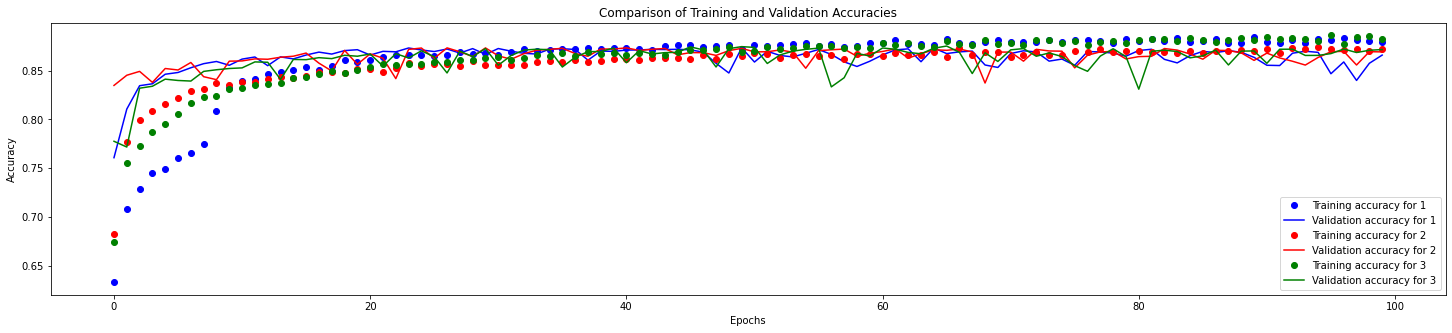

In [77]:
# Compare the accuracies of three training processes
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']

PlotThreeAccuracyComparison(acc1, val_acc1, acc2, val_acc2, acc3, val_acc3, '1', '2', '3')

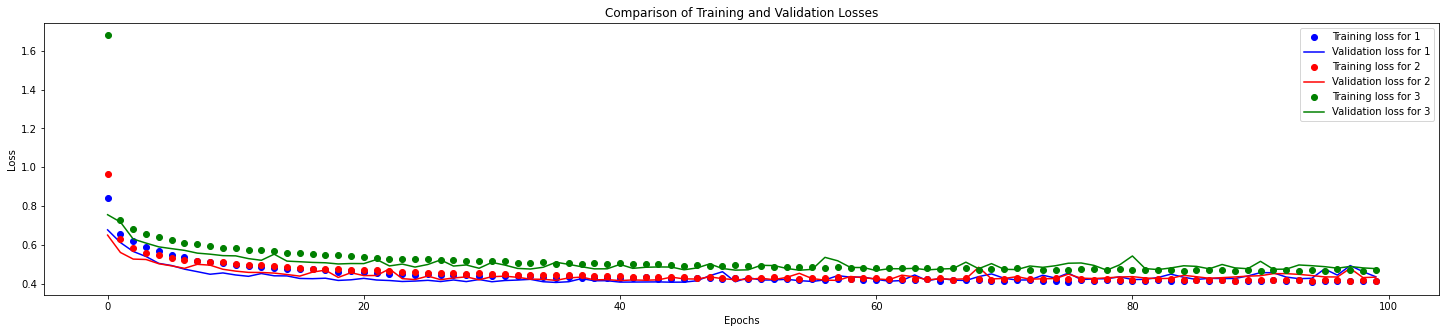

In [78]:
# Compare the losses of three training processes
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

PlotThreeLossComparison(loss1, val_loss1, loss2, val_loss2, loss3, val_loss3, '1', '2', '3')

In [79]:
argmax1 = np.argmax(val_acc1)
argmax2 = np.argmax(val_acc2)
argmax3 = np.argmax(val_acc3)
print ('Max accuracy for model 1 is: ', val_acc1[argmax1], ', achieved in the ', argmax1 , 'epoch.')
print ('Max accuracy for model 2 is: ', val_acc2[argmax2], ', achieved in the ', argmax2 , 'epoch.')
print ('Max accuracy for model 3 is: ', val_acc3[argmax3], ', achieved in the ', argmax3 , 'epoch.')

Max accuracy for model 1 is:  0.8733999729156494 , achieved in the  49 epoch.
Max accuracy for model 2 is:  0.8733999729156494 , achieved in the  40 epoch.
Max accuracy for model 3 is:  0.8752400279045105 , achieved in the  65 epoch.


In previous model best accuracy was 0.8751599788665771 

In [82]:
print(f"Which is {100*(val_acc3[argmax3]-0.8751599788665771)}% worse then accuracy achived in new model 3. Improvement has been achieved")

Which is 0.008004903793334961% worse then accuracy achived in new model 3. Improvement has been achieved


## Assignments

* Experiment with the model capacity (changing the number of layers, neurons in layers) and conclude about it, trying to find a model which will achieve still better validation accuracy and loss.
* Experiment with regularization parameters and various regularizers to achieve still better validation accuracy and loss.
* Try to perform such experiments on a different training dataset, downloaded from <a href="www.kaggle.com">Kaggle.com</a>.

Send back the notebook with your solution, presenting your experiments below:

## Model Capacity

In [88]:
acc_to_beat_1 = 0.8752400279045105

In [11]:
import matplotlib.pyplot as plt  # library for plotting math functions: https://matplotlib.org/stable/index.html
from keras.datasets import imdb
from keras import regularizers
import numpy as np
import tensorflow as tf
import keras

print ("TensorFlow version: " + tf.__version__)
print ("Keras version: " + keras.__version__)

from keras import models
from keras import layers
    
def PlotAccuracy(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    plt.clf()   # clear figure
    plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and Validation Accuracies')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

def PlotLoss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.clf()   # clear figure
    plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and Validation Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
def ShowResult(history, acc_to_beat):
    val_acc = history.history['val_acc']
    argmax = np.argmax(val_acc)
    print ('Max accuracy for new model is: ', val_acc[argmax], ', achieved in the ', argmax , 'epoch.')
    print ('Max accuracy for old model is: ', acc_to_beat)
    print (f"Change: {100*(val_acc[argmax] - acc_to_beat)}%" )

def vectorize_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # set specific indices of results[i] to 1s
        results[i, sequence] = 1.
    return results

def vectorize_data_float_labels(data, labels, dimension):
    # Our vectorized training data
    x = vectorize_sequences(data, dimension)
    # Our vectorized labels
    y = np.asarray(labels).astype('float32')
    return x, y

TensorFlow version: 2.4.1
Keras version: 2.4.3


In [91]:
def CreateNewModel(num_top_words):
    model = models.Sequential()
    
    model.add(layers.Dense(6, 
                           kernel_regularizer=regularizers.l1(0.0005),
                           activation='relu',
                           input_shape=(num_top_words,)))
    
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Dense(1,
                           activation='sigmoid'))
    return model

def CreateNewModel2(num_top_words):
    model = models.Sequential()
    
    model.add(layers.Dense(7,
                           kernel_regularizer=regularizers.l1(0.001),
                           activation='relu',
                           input_shape=(num_top_words,)))
    
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [86]:
# Load IMDB data with the specified number of the most frequently words
num_top_words=2000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_top_words)

x_train, y_train  = vectorize_data_float_labels(train_data, train_labels, num_top_words)
x_val, y_val = vectorize_data_float_labels(test_data, test_labels, num_top_words)

my_model = CreateNewModel2(num_top_words=num_top_words)

my_model.summary()

my_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

my_history = my_model.fit(x_train, y_train,
                            epochs=100,
                            batch_size=512,
                            validation_data=(x_val, y_val))

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 7)                 14007     
_________________________________________________________________
dropout_18 (Dropout)         (None, 7)                 0         
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 8         
Total params: 14,015
Trainable params: 14,015
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
49/49 [==============================] - 2s 15ms/step - loss: 0.9045 - acc: 0.6402 - val_loss: 0.6156 - val_acc: 0.8103
Epoch 2/100
49/49 [==============================] - 0s 9ms/step - loss: 0.6004 - acc: 0.7917 - val_loss: 0.5296 - val_acc: 0.8525
Epoch 3/100
49/49 [==============================] - 0s 8ms/step - loss: 0.5397 - acc: 0.8150 - val_loss: 0.5007 - v

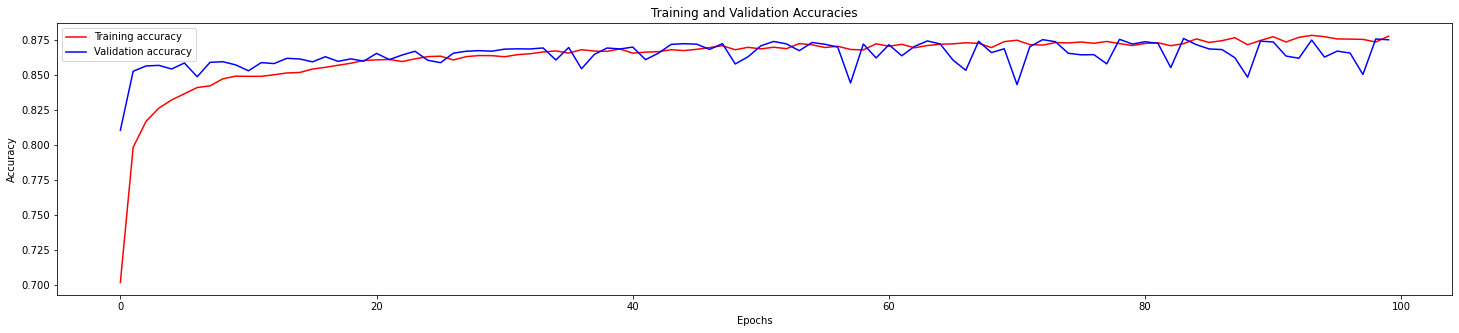

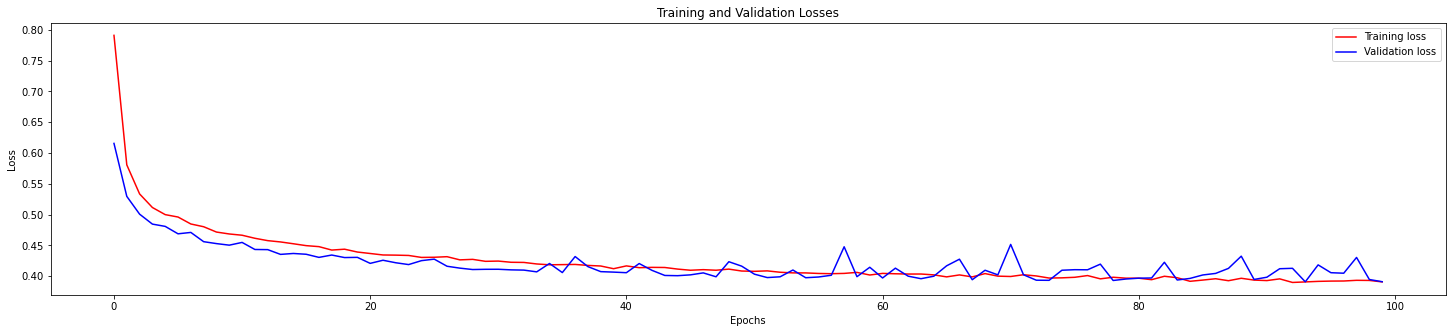

Max accuracy for new model is:  0.8758800029754639 , achieved in the  83 epoch.
Max accuracy for old model is:  0.8752400279045105
Change: 0.06399750709533691%


In [87]:
PlotAccuracy(my_history)
PlotLoss(my_history)
ShowResult(my_history, acc_to_beat_1)

## Regularization Parameters

In [92]:
acc_to_beat_2 = 0.8758800029754639

In [93]:
# Load IMDB data with the specified number of the most frequently words
num_top_words=2000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_top_words)

x_train, y_train  = vectorize_data_float_labels(train_data, train_labels, num_top_words)
x_val, y_val = vectorize_data_float_labels(test_data, test_labels, num_top_words)

my_model = CreateNewModel(num_top_words=num_top_words)

my_model.summary()

my_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

my_history = my_model.fit(x_train, y_train,
                            epochs=100,
                            batch_size=512,
                            validation_data=(x_val, y_val))

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 6)                 12006     
_________________________________________________________________
dropout_19 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 7         
Total params: 12,013
Trainable params: 12,013
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
49/49 [==============================] - 1s 14ms/step - loss: 0.7624 - acc: 0.6375 - val_loss: 0.5657 - val_acc: 0.8375
Epoch 2/100
49/49 [==============================] - 0s 8ms/step - loss: 0.5506 - acc: 0.8164 - val_loss: 0.4916 - val_acc: 0.8548
Epoch 3/100
49/49 [==============================] - 0s 9ms/step - loss: 0.4889 - acc: 0.8397 - val_loss: 0.4511 - v

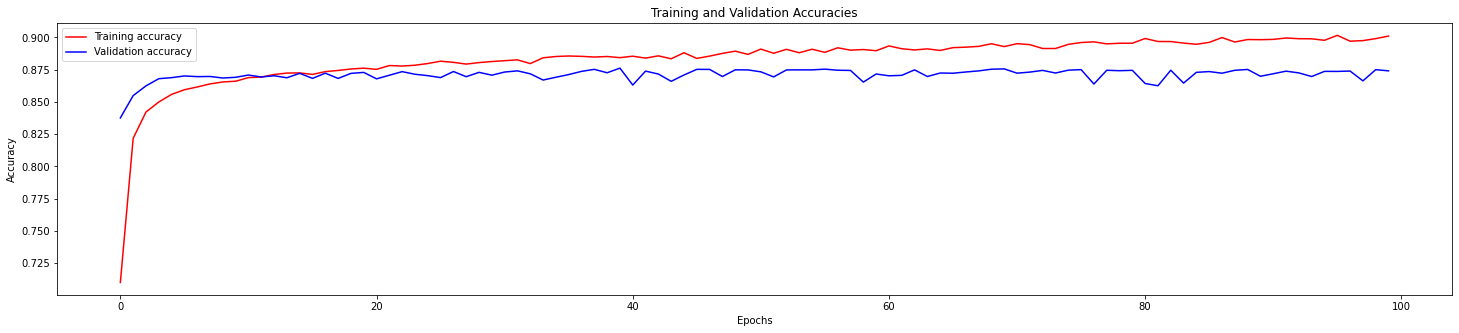

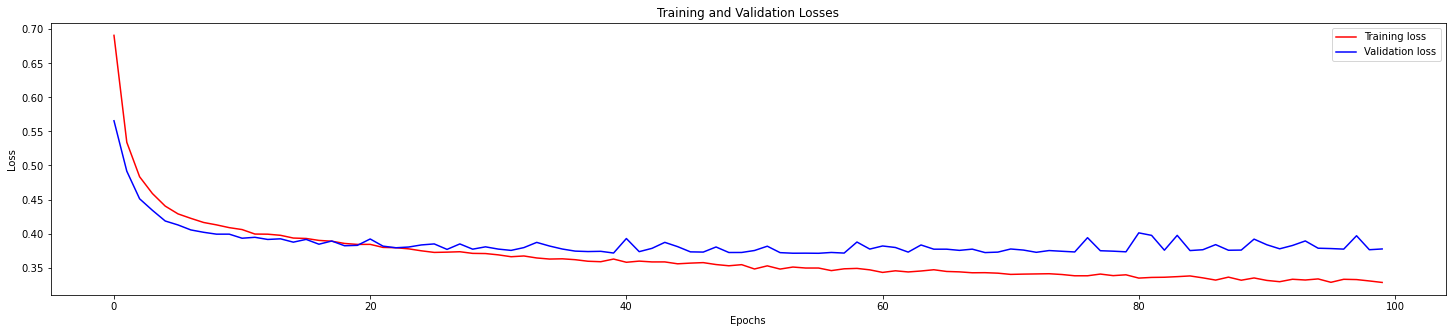

Max accuracy for new model is:  0.8761199712753296 , achieved in the  39 epoch.
Max accuracy for old model is:  0.8758800029754639
Change: 0.023996829986572266%


In [94]:
PlotAccuracy(my_history)
PlotLoss(my_history)
ShowResult(my_history, acc_to_beat_2)

Improvement has been achieved yet again

## Kaggle.com dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

scaler = MinMaxScaler()

In [2]:
df_train = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_data.csv')

In [3]:
df_train.head()
df_test.head()

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,791,792,0,1,0.2000,0.050749,0,1,0,0.0,1,0,0,0,0,0,1
1,792,793,0,0,0.3500,0.135753,0,0,1,1.0,0,0,0,1,0,0,1
2,793,794,0,1,0.3500,0.059914,1,0,0,0.0,1,0,0,0,1,0,0
3,794,795,0,1,0.3125,0.015412,0,0,1,0.0,1,0,0,0,0,0,1
4,795,796,0,1,0.4875,0.025374,0,1,0,0.0,1,0,0,0,0,0,1


In [4]:
df_train = df_train.drop(df_train.columns[0],axis=1)
df_train = df_train.drop(df_train.columns[0],axis=1)
df_train.head()

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1
1,1,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0
2,1,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1
3,1,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1
4,0,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1


In [5]:
df_test = df_test.drop(df_test.columns[0],axis=1)
df_test = df_test.drop(df_test.columns[0],axis=1)
df_test.head()

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0.2000,0.050749,0,1,0,0.0,1,0,0,0,0,0,1
1,0,0,0.3500,0.135753,0,0,1,1.0,0,0,0,1,0,0,1
2,0,1,0.3500,0.059914,1,0,0,0.0,1,0,0,0,1,0,0
3,0,1,0.3125,0.015412,0,0,1,0.0,1,0,0,0,0,0,1
4,0,1,0.4875,0.025374,0,1,0,0.0,1,0,0,0,0,0,1


In [6]:
label_encoder=LabelEncoder()

df_train.apply(label_encoder.fit_transform)
df_test.apply(label_encoder.fit_transform)

X_test = df_test.drop('Survived',axis=1)
y_test = df_test['Survived']

X_train=df_train.drop('Survived',axis=1)
y_train=df_train['Survived']

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=100)

X_train[['Age','Fare']] = scaler.fit_transform(X_train[['Age','Fare']])
X_val[['Age','Fare']] = scaler.fit_transform(X_val[['Age','Fare']])
X_test[['Age','Fare']] = scaler.fit_transform(X_test[['Age','Fare']])

In [7]:
X_train.head()

,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
288,1,0.520988,0.025374,0,1,0,0.0,1,0,0,0,0,0,1
81,1,0.357116,0.018543,0,0,1,0.0,1,0,0,0,0,0,1
491,1,0.256271,0.014151,0,0,1,0.0,1,0,0,0,0,0,1
56,0,0.256271,0.020495,0,1,0,0.0,0,0,0,1,0,0,1
783,1,0.344510,0.045771,0,0,1,0.3,1,0,0,0,0,0,1


In [8]:
y_train.head()

288    1
81     1
491    0
56     1
783    0
Name: Survived, dtype: int64

In [21]:
import matplotlib.pyplot as plt  # library for plotting math functions: https://matplotlib.org/stable/index.html
from keras.datasets import imdb
from keras import regularizers
import numpy as np
import tensorflow as tf
import keras

print ("TensorFlow version: " + tf.__version__)
print ("Keras version: " + keras.__version__)

from keras import models
from keras import layers

def PlotAccuracy(history, name):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    plt.clf()   # clear figure
    plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and Validation Accuracies - model ' + str(name))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

def PlotLoss(history, name):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.clf()   # clear figure
    plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and Validation Losses - model ' + str(name))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
def create_titanic_model(hl1, hl2, probdrop, reg):
    model = models.Sequential()
    model.add(layers.Dense(hl1,
                           kernel_regularizer=regularizers.l1(reg),
                           activation='relu'))
    
    model.add(layers.Dropout(probdrop))
    
    model.add(layers.Dense(hl2,
                           activation='relu'))
    
    model.add(layers.Dense(1,
                           activation='sigmoid'))
    return model

def ShowResult(history, name):
    val_acc = history.history['val_acc']
    argmax = np.argmax(val_acc)
    print ('Max accuracy for new model ' + str(name) + ' is: ', val_acc[argmax], ', achieved in the ', argmax , 'epoch.')

TensorFlow version: 2.4.1
Keras version: 2.4.3


In [29]:
hl1 =      [8, 16, 32]
hl2 =      [4, 8, 16]
probdrop = [0, 0.1, 0.2 ]
reg =      [0.001, 0.001, 0.001]

results_los = []
results_acc = []
histories = []

for i in range(3):
    print("model ", i+1)
    my_model = create_titanic_model(hl1[i], hl2[i], probdrop[i], reg[i])


    my_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

    my_history = my_model.fit(X_train, y_train,
                              verbose=0,
                              epochs=100,
                              batch_size=512,
                              validation_data=(X_val, y_val))
    results = my_model.evaluate(X_test, y_test)
    
    results_los.append(results[0])
    results_acc.append(results[1])
    histories.append(my_history)

model  1
4/4 [==============================] - 0s 999us/step - loss: 0.5331 - acc: 0.7400
model  2
4/4 [==============================] - 0s 999us/step - loss: 0.4663 - acc: 0.7800
model  3
4/4 [==============================] - 0s 999us/step - loss: 0.4371 - acc: 0.8700


Max accuracy for new model 3 is:  0.8113207817077637 , achieved in the  62 epoch.
test loss :  0.4371366798877716  test acc :  0.8700000047683716


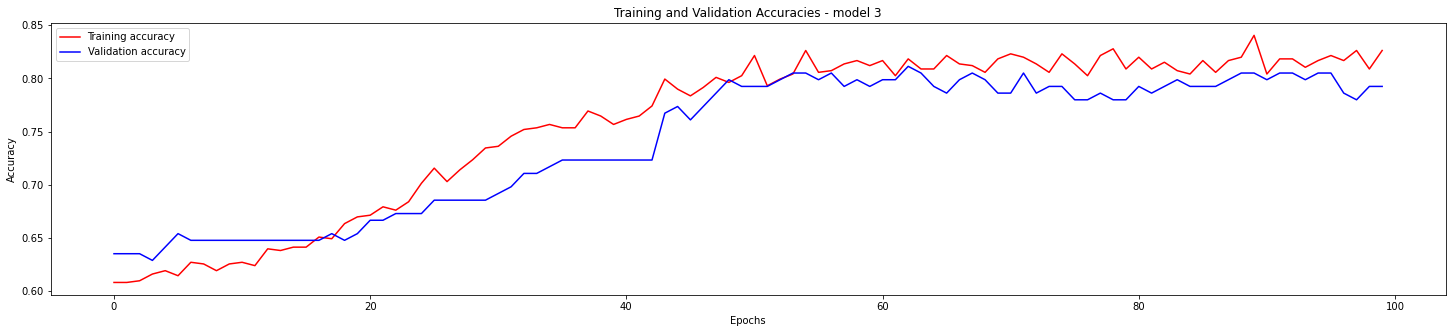

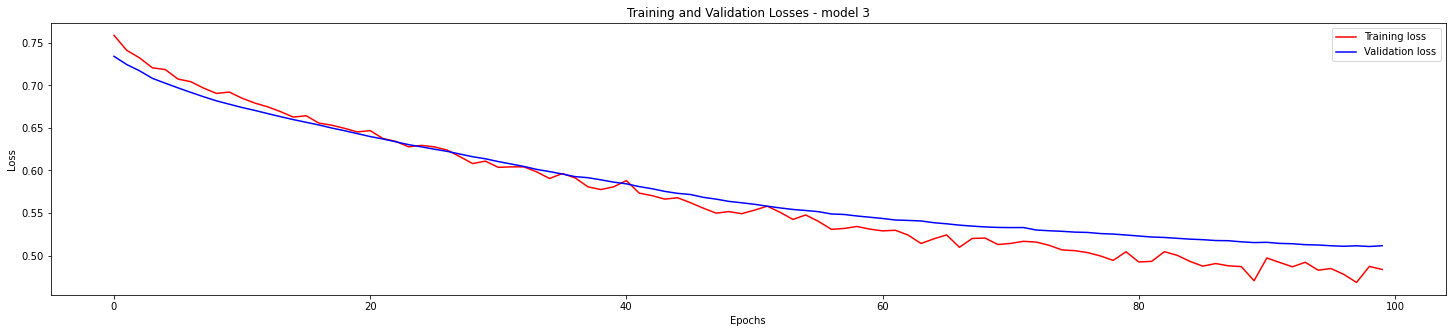

In [31]:
i = 2
ShowResult(histories[i], i+1)
print("test loss : ", results_los[i], " test acc : ", results_acc[i])
PlotAccuracy(histories[i], i+1)
PlotLoss(histories[i], i+1)


#### Model used parameters:
- Sex
- Age
- Fare 
- Pclass_1
- Pclass_2
- Pclass_3
- Family_size
- Title_1
- Title_2
- Title_3
- Title_4
- Emb_1
- Emb_2
- Emb_3

#### Best model
- layer 1 - 32 neurons
- layer 2 - 16 neurons
- layer 3 - 1 neuron
- dropout - 0.2
- regularizers l1 - 0.001
- test loss - 0.4371366798877716  
- testacc :  0.8700000047683716
